# Implementing Custom RandomSearchCV

In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances


x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)

# del X_train,X_test

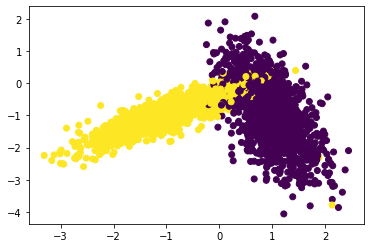

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

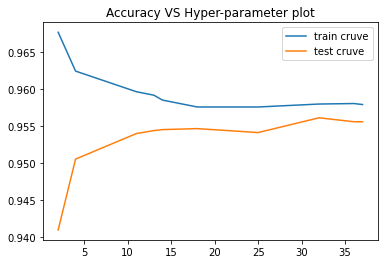

In [3]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import random
import math
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
def get_train_and_test_index(chunk_size,folds):
    return list(set(list(range(0, len(X_train)))) - set(list(range(chunk_size*(folds),chunk_size*(folds+1))))),list(range(chunk_size*(folds),chunk_size*(folds+1)))
        
def RandomSearchCV(x_train,y_train,classifier, param, folds):
    trainscores = []
    testscores  = []  
    chunk_size = math.floor(len(x_train)/folds)
    for i in param:
        trainscores_folds = []
        testscores_folds  = []
        for j in range(0,folds):
            train_indices,test_indices=get_train_and_test_index(chunk_size,j)
            X1_train = x_train[train_indices]
            Y1_train = y_train[train_indices]
            X1_test  = x_train[test_indices]
            Y1_test  = y_train[test_indices]

            classifier.n_neighbors = i
            classifier.fit(X1_train,Y1_train)
            
            Y_predicted = classifier.predict(X1_test)
            testscores_folds.append(accuracy_score(Y1_test, Y_predicted))

            Y_predicted = classifier.predict(X1_train)
            trainscores_folds.append(accuracy_score(Y1_train, Y_predicted))
        trainscores.append(np.mean(np.array(trainscores_folds)))
        testscores.append(np.mean(np.array(testscores_folds)))
    return trainscores,testscores

neigh = KNeighborsClassifier()

params=sorted(random.sample(range(1,50), 10))
folds = 3

trainscores,testscores=RandomSearchCV(X_train, y_train, neigh, params, folds)

plt.plot(params,trainscores, label='train cruve')
plt.plot(params,testscores, label='test cruve')
plt.title('Accuracy VS Hyper-parameter plot')
plt.legend()
plt.show()

In [4]:
# understanding this code line by line is not that importent 
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

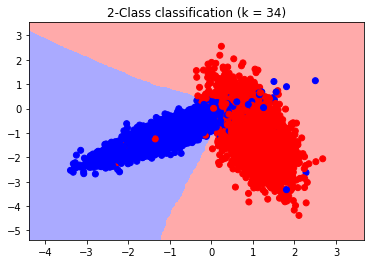

In [5]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 34)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)